In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# check what version of packages are installed.
print("NumPy version",np.__version__, "pandas version ",pd.__version__, "seaborn version",sns.__version__  )  # '1.16.2'

# set print options with floating point precision if 4, summarise long arrays using threshold of 5, suppress small results
np.set_printoptions(precision=4, threshold=5, suppress=True)  # set floating point precision to 4
pd.options.display.max_rows=8 # set options to display max number of rows


NumPy version 1.24.3 pandas version  2.0.3 seaborn version 0.12.2


In [2]:
csv_url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv'
df =  pd.read_csv(csv_url)

# Check the DataFrame looks ok
Having successfully read in the csv file into a pandas DataFrame object, panda's head and tail functions can be used to ensure the file has been read in and looks ok before exploring the DataFrame further below. As it is a very small file it can be quickly checked against the csv file source to check that everything looks ok. tail() is particularly useful for making sure a csv file has been read in properly as any problems usually manifest towards the end of the dataframe, throwing out the last number of rows but all looks well here.

In [3]:
print('the first rows in the dataset are as follows', df.head(5))
print('the final rows in the dataset are as follows', df.tail(5))

the first rows in the dataset are as follows    total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
the final rows in the dataset are as follows      total_bill   tip     sex smoker   day    time  size
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2


# Tidy data principles
The tips dataset illustrates the "tidy" approach to organising a dataset. The tips csv dataset has been imported into a pandas DataFrame object. Each column contains one variable and there are 244 rows in the dataFrame with one row for each of the 244 observations.

Again referring to Howard Seltman's book, data from an experiment are generally collected into a rectangular array most commonly with one row per experimental subject and one column for each subject identifier, outcome variable and explanatory variable. The Tips dataset follows this principle. Each of the columns have either numeric values for a particular quantitative variable or the levels for a categorical variable.

# What does the dataset look like?
Once loaded a dataset can be explored using the pandas and seaborn packages which work well together for analysing datasets such as this one. Pandas has many useful functions for slicing and dicing the data and can easily generate statistics such as the five number summary promoted by Tukey. Pandas can also be used to plot the data but this is where the seaborn package shines.

# Column and row names:
When the 'tips' csv dataset was read in, the column names were assigned using the first line of data in the csv file which is the default treatment with pandas.read_csv() if you have not set a header row or provided column names. You can however provide different column names by setting header=None in the read_csv function and then providing the names to use using the names argument, for example names= 'col-name1', 'col-name2' etc.

In [4]:
print('the index of the tips dataset', df.index)

the index of the tips dataset RangeIndex(start=0, stop=244, step=1)


There are 7 columns as expected and an index that begins at 0 for the first row. If the index of a DataFrame is not set to a particular column or some other value using index_col argument to read_csv , it will default to a sequence of integers beginning at 0 which is fine for the Tips dataset. The index goes from 0 (for the first row) up to 243 for the last row or observation in the dataset. The index is a range of integers from 0 up to but not including 244.

dtypes:
The dtypes (data types) have been inferred by read_csv but it is also possible to pass the data type when reading in the file.

In [5]:
print('The dtypes in the dataset are as:', end='n/n')
print(df.dtypes)

The dtypes in the dataset are as:n/ntotal_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object


There are three numerical columns and 4 non-numerical object columns. The variables total_bill and tip are floats representing US dollar amounts while size is an integer representing the number of people in the party. The remaining columns have been read in as objects. Pandas uses the object dtype for storing strings, other arbitary objects or when there are mixed types in a column.

smoker is a binary categorical variable with two values yes or no. sex is also binary categorical variable with two values Male and Female. The 'day' and 'time' variables in this dataset could also be seen as categorical variables here as they have a limited number of distinct possible values. The time column here is not an actual time but instead just a binary categorical variable with two possible values dinner and lunch while day has four possible values: Thur, Fri, Sat and Sun for Thursday, Friday, Saturday and Sunday.

When a string variable consists of only a few values, converting such string variables to categorical data variable will actually save some memory. Specifying dtype='category' will result in an unordered Categorical whose categories are the unique values observed in the data. You can also use the astype on the dataframe to convert a dtype in a dataframe.

# Converting variables to type category:

In [6]:
df['sex']=df['sex'].astype('category')
df['smoker']=df['smoker'].astype('category')
df['day']=df['day'].astype('category')
df['time']=df['time'].astype('category')
print(*df.dtypes)

float64 float64 category category category category int64


# Checking for missing or N/A values
Next checking to see if there are any missing values or NA's in the dataset using isna()function and summing up the True or False boolean values to get a count of any missing values which in this case is zero as there are no missing or na values.

In [7]:
print(*df.isna().any())

False False False False False False False


Pandas has many useful functions for slicing and dicing the data. The data can be sorted and particular rows and columns can be selected in different ways.

Sorting by values:
While the head and tail functions show the top and bottom rows of a dataset as read in from the data source, the values may not be sorted. The sort_values function can be used to sort the dataframe in ascending or descending order by one or more variables to get an idea of the range of values in the dataset.

In [8]:
df.sort_values(by='tip').head()
df.sort_values(by='total_bill', ascending= False).head(3)

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.00,Male,Yes,Sat,Dinner,3
212,48.33,9.00,Male,No,Sat,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4


# Describing the Tips Dataset using statistics.
Exploratory data analysis generally involves both non-graphical methods which include calculation of summary statistics and graphical methods which summarises the data in a picture or a plot. These methods can be univariate where one variable is looked at at a time or multivariate where two or more variables are looked at together to explore relationships. Seltman[1] recommends performing univariate EDA on each of the components before going on to do multivariate EDA. The actual EDA performed depends on the role and type of each variable. I will first look at the summary statistics of the categorical variables and then the numerical variables. For categorical variables the range of values and the frequency or relative frequency of values are of interest with the fraction of data that fall into each category.

xploratory data analysis generally involves both non-graphical methods which include calculation of summary statistics and graphical methods which summarises the data in a picture or a plot. These methods can be univariate where one variable is looked at at a time or multivariate where two or more variables are looked at together to explore relationships. Seltman[1] recommends performing univariate EDA on each of the components before going on to do multivariate EDA. The actual EDA performed depends on the role and type of each variable. I will first look at the summary statistics of the categorical variables and then the numerical variables. For categorical variables the range of values and the frequency or relative frequency of values are of interest with the fraction of data that fall into each category.

Univariate non-graphical exploratory data analysis of Tips dataset.
Categorical variables in the Tips dataset:
Panda's describe function can be used to look at categorical or object type data and present it in a table. For object data it include the count(the number of non-null observations), unique, top (the most common value) and the frequency of the most common value.

In [9]:
print("Table of characteristics of the categorical variables in the Tips dataset:\n")
df.describe(include=['category'])

Table of characteristics of the categorical variables in the Tips dataset:



,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


The total count of variables is 244 so there are no missing observations.

Sex: There are 157 male bill payers out of 244 observations leaving only 87 female bill-payers.

Smoker: There a more non-smokers in the dataset with 151 out of the total of 244 observations having only non-smokers in the party while 93 parties include smokers.

Time: The data includes 176 dinners out of 244 meals wuth the remaining 68 meals being lunches.

Day: Saturday is the most frequent day in this dataset.

Characteristics of Quantitative variables in the Tips dataset
Univariate EDA for a quantitative variable is a way to make preliminary assessents about the population distribution of the variable using the data of the observed sample.

When looking at quantitative variables the characteristics of interest are the centre, spread, modality (the number of peaks in the pdf), the shape of the distribution and the outliers.

(Seltman notes that the observed data generally represents just one sample out of many possible samples. In the case of the Tips dataset in question, it could be considered as just one sample of measurements out of many possible samples where the values would be different if a different sample was taken by a different waiter maybe or in a different timeframe. The sample statistics below would then be estimates of the corresponding population parameters.)

Tukey's five number summary include the minimum and maximum which refer to the extremes of the data, the median and the quartiles which unlike the mean and standard deviations are functions of the empirical distribution and are defined for all distributions. The quartiles and median are considered more robust to skewed distributions than the mean and standard deviation.

Pandas describe function generates statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution. (excluding NaN values). It summarise and describe the numerical variables of the dataframe by including the count, mean, standard deviation, minimum and maximum values, median and the 25th and 75th percentiles. These statistics can also be obtained using the various statistics functions such as mean, sd, min, max etc. The only numerical variables in this dataset are the total_bill amount in dollars, the tip amount in dollars and size for the number of people in a party. (These are really just sample statistics).

In [10]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


# the range of data

In [11]:
print("The minimum bill amount is $",df['total_bill'].min()," while the maximum bill amount is $", df['total_bill'].max(), " giving range of ",df['total_bill'].max() - df['total_bill'].min())
print("The minimum tip amount is $",df['tip'].min()," while the maximum tip amount is $", df['tip'].max(), "giving a range of ",df['tip'].max() - df['tip'].min())
print("The number of people in each dining party varies from",df['size'].min(),"to",df['size'].max(), "people" )


The minimum bill amount is $ 3.07  while the maximum bill amount is $ 50.81  giving range of  47.74
The minimum tip amount is $ 1.0  while the maximum tip amount is $ 10.0 giving a range of  9.0
The number of people in each dining party varies from 1 to 6 people


# The Interquartile range

In [12]:
print("The median bill amount is ",df['total_bill'].quantile(q=0.5), "dollars and the median tip amount is", df['tip'].quantile(q=0.5),"dollars")
print(f"The total bill IQR is the range from {df['total_bill'].quantile(q=0.25):.2f} to {df['total_bill'].quantile(q=0.75):.2f}")
print(f"The tip IQR ranges from {df['tip'].quantile(q=0.25):.2f} to dollars {df['tip'].quantile(q=0.75):.2f}")

The median bill amount is  17.795 dollars and the median tip amount is 2.9 dollars
The total bill IQR is the range from 13.35 to 24.13
The tip IQR ranges from 2.00 to dollars 3.56


The range of values for the bill amount is quite large varying between roughly 3 and 48 dollars while the tip amounts range from between 1 and 10 dollars. The interquartile range is closer to the mean values.

# Describing the Tips dataset using plots.
This section will look at some graphical EDA of the univariate data in the Tips dataset.

While pandas functions were used above to look at a summary statistics of the dataset using statistics, the seaborn package will now be used to create some visualisations of the dataset that can be used to verify these summary statistics. Plots can highlight any obvious relationships between the different variables in the dataset. They can also be used to identify any groups of observations that are clearly separate to other groups of observations. There are many different ways to visualise this dataset using the seaborn library and no universal best way and many examples at https://seaborn.pydata.org .

# Visualising the categorical variables in the Tips dataset
There are four categorical variables in the Tips dataset as seen above. These are day, time, sex and smoker. Here I will show the distribution of the categorical variables using a countplot which is a bit like a histogram but across a categorical instead of quantitative variable. A countplot can be used to show the number of occurences in each category of a variable. I will first look at the number of bill payers by day. The count is not the overall number of people in the restaurant but the number of bill payers. In addition to showing the count of a category, a hue semantic can be used to show the breakdown by the levels of a second variable.

I will create a day_order to store the order in which to display the days on the plots.

In [13]:
df.describe(include=['category'])

,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


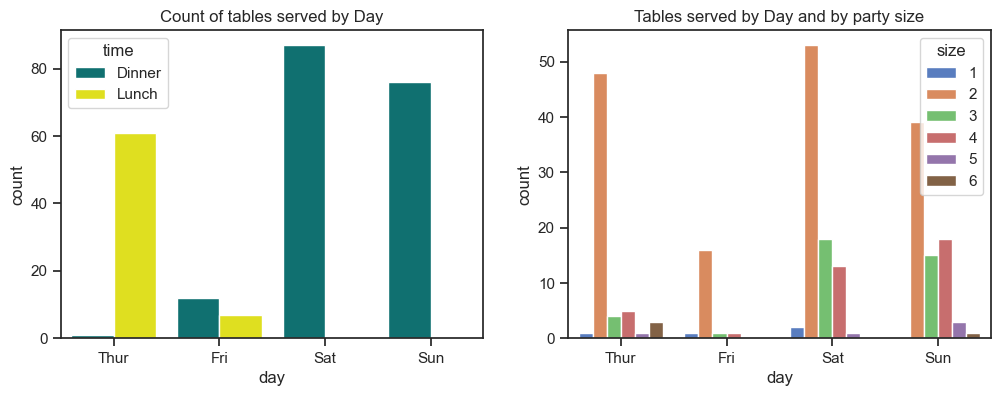

In [14]:
day_order = ['Thur', 'Fri', "Sat", "Sun"]
sns.set(style="ticks", palette="muted")

f, axes = plt.subplots(1, 2, figsize=(12,4))
day_order=["Thur", "Fri", "Sat", "Sun"]
sns.countplot(x ="day",data =df, hue="time", palette=["teal","yellow"], order=day_order, ax=axes[0])
axes[0].set_title("Count of tables served by Day")

# plot number of  tables per day by size of party
sns.countplot(x =("day"), hue="size",data =df, ax=axes[1], order=day_order)
axes[1].set_title("Tables served by Day and by party size");

Fridays are the quietest days for this waiter. Saturdays are the busiest days followed by Sundays so there are more customers at the weekend.
The mosy common party size by far is 2. There are very few lone diners and very few parties of 5 and 6.

In [15]:
pal = dict(Lunch="seagreen", Dinner="gray")

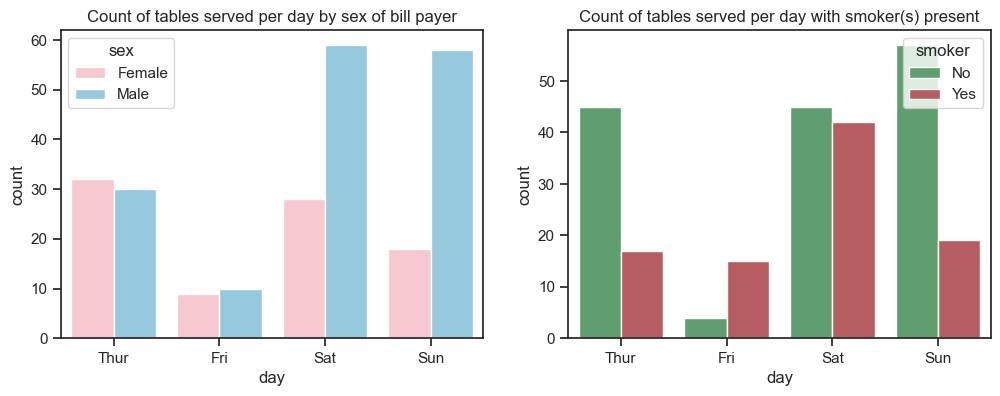

In [16]:
sns.set(style="ticks")
f, axes = plt.subplots(1, 2, figsize=(12, 4))
order = ['Thur', 'Fri', 'Sat', 'Sun']
gender_pal = dict(Female='pink', Male="skyblue")
smoker_pal= dict(Yes="r", No="g")
sns.countplot(x ="day", hue="sex", palette=gender_pal,data =df, order=order, ax=axes[0])
axes[0].set_title("Count of tables served per day by sex of bill payer")

# plot number of  tables per day by size of party
sns.countplot(x =("day"), hue="smoker",data =df, ax=axes[1], palette=smoker_pal, order=day_order)
axes[1].set_title("Count of tables served per day with smoker(s) present");

There are almost equal numbers of male and female bill-payers on Thursdays and Fridays but the number of male bill-player far out-weighs female bill-payers at the weekend.
There are more non-smokers than smokers on any day but especially on Thursdays and Sundays. While there are much less customers recorded for Fridays than any other days, these customers are mostly smokers.
There are almost equal number of male and female bill-paying customers for lunch but far more males for dinner. There are more male paying customers overall.

# Histogram and Kernel Density estimate plots of Total bill and Tip amount.
A histogram is a plot that shows the distribution of a single quantitative variable such as the total bill amount or the tip amount. A histogram represents the distribution of data by forming bins along the range of the data and then drawing bars to show the number of observations that fall in each bin. It charts the data using adjacent rectangular bars and displays either the frequency or relative frequency of the measurements for a range of values in each interval. Each interval or range of values is a bin. The number of bins can be specified although seaborn and matplotlib will automatically choose this. The number of bins chosen usually depends on the amount of data and the shape of the distribution. distplot() uses a simple rule to make a good guess for what the right number is by default, but this can be changed which might reveal other features of the data.

The histogram visualises the centre and spread of the distribution as well as showing if there is any skew in the data. Below are the histograms of the Tip amount and the total bill amounts. The mean is shown as the red line and the median as the green dashed line. For symmetric distributions the mean is at the centre of the distribution and coincides with the median. Where the distribution is skewed the mean is further over than the median to the long tail which can be seen below for the total bill amount.

The mode is the most frequently occuring value in a distribution. There is no mode function in pandas or even numpy. It is not really used as such except for describing whether a distribution is unimodal, bimodal or multimodal which depends on how many peaks there is in the distribution. In multimodal distributions there is no unique highest mode.

Seaborn's distplot() function draws a histogram and fit a kernel density estimate (KDE).

The kernel density estimate can be a useful tool for plotting the shape of a distribution. It also represents the density of observations on one axis with height along the other axis but involves further calculations where each observation is replaced with a normal gaussian curve centred at that value, these curves are then summed to compute the value of the density at each point in the support grid. The resulting curve is then normalized so that the area under it is equal to 1. A kernel density plot can also be drawn using the kdeplot function and with this you can specify a bandwidth (bw) parameter which controls how tightly the estimation is fit to the data.

C:\Users\keith\AppData\Local\Temp\ipykernel_9944\572440869.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['total_bill'], kde=True, rug=True, ax=axes[0], color="blue", bins=25)
C:\Users\keith\AppData\Local\Temp\ipykernel_9944\572440869.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d

Text(0.5, 1.0, 'Histogram of  Tip amounts')

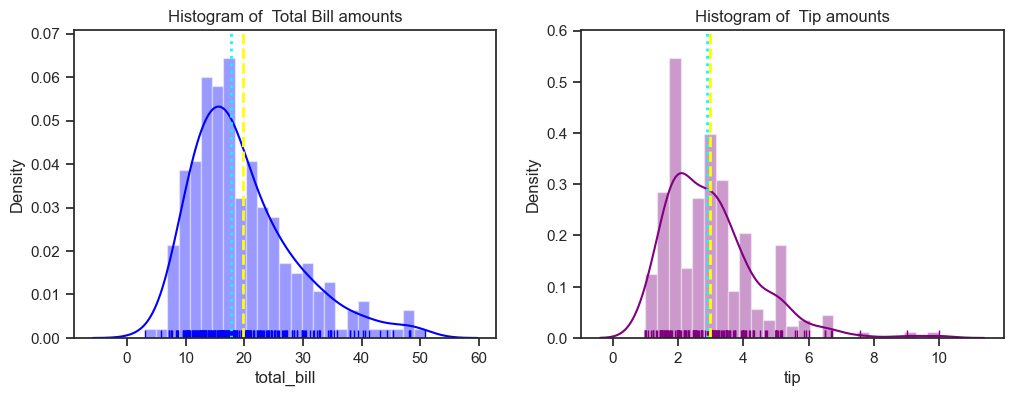

In [17]:
%matplotlib inline 
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.distplot(df['total_bill'], kde=True, rug=True, ax=axes[0], color="blue", bins=25)
axes[0].axvline(df['total_bill'].mean(), color='yellow', linewidth=2, linestyle='--')
axes[0].axvline(df['total_bill'].quantile(q=0.5), color='cyan', linewidth=2, linestyle=":")
# add a title
axes[0].set_title("Histogram of  Total Bill amounts")

sns.distplot(df['tip'], kde=True, rug=True, ax=axes[1], color="purple", bins=25)
axes[1].axvline(df['tip'].mean(), color='yellow', linewidth=2, linestyle="--")
# add a vertical line to show the median
axes[1].axvline(df['tip'].quantile(q=0.5), color='cyan', linewidth=2, linestyle=":")
# add title
axes[1].set_title("Histogram of  Tip amounts")

The histograms show that most total bill amounts fall in the range between 10 and 30 dollars with a peak around 16 dollars. It has only one peak when the default number of bins is used. As more bins are used you would expect to see more peaks in the distribution. The mean is the light yellow line and the median is the broken blue line. As the summary statistics above showed the median total total bill is about 2 dollars less than the mean indicating a non-symmetrical distribution. The mean and median tip amount are very close to each other. The distributions here do look slightly right skewed but you would expect not to see values near zero anyway for total bill amounts. The tips histograms shows that most tips fall in the range between 2 and 4 dollars with two distinct peaks at about 2.50 and 3.50.

The peaks of the kernel density estimates show which values have the highest priobability.

## Boxplots of Total Bill amounts and Tip amounts
Boxplots can be used to show the central tendency, symmetry and skew of the data and any outliers. The rectangular box is bounded by the 'hinges' representing the lower (1st quartile) and upper (3rd quartile) while the line drawn through the box represents the median. The whiskers are the lines that extend out from the box in both directions and are drawn to the point that is 1.5 times the IQR. Outliers are any points that are outside of the whiskers. The whiskers represent the minimum and maximum values of the data excluding the outliers. The boxplots show if the data is symmetric or not - if the median is in the centre of the box and the whiskers are the same length. A skewed distribution has the median nearer to the shorter whisker. A positively skewed or right skewed distribution has a longer top whisker than bottom whisker whereas a negatively skewed or left skewed distribution has a longer lower whisker.

Boxplots use robust median and IQR statistics instead of the more sensitive mean and standard deviations.

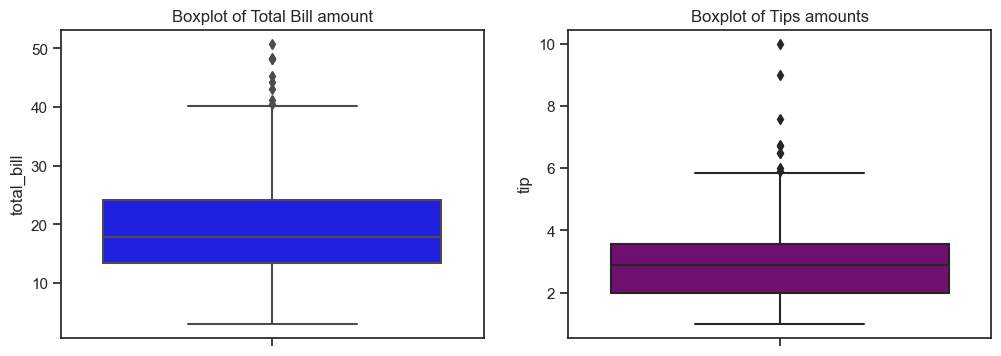

In [18]:
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.set(style="ticks", palette="pastel")
sns.boxplot(y=df['total_bill'], ax=axes[0], color="blue")
# add a title
axes[0].set_title("Boxplot of Total Bill amount")
sns.boxplot(y=df['tip'], ax=axes[1], color="purple")
axes[1].set_title("Boxplot of Tips amounts");

The boxplots above shows similar information on the distribution of total bill and tip amounts as the distribution plots above. The rectangular boxes show the middle half of the distribution. The median bill amount is about 18 and the median tip amount is over 3 dollars. Total bills over 40 represent outliers while tips over 6 dollars are considered outliers. Boxplots can be used to compare distributions, often for one variables at different levels of another variable. I will look at this more in section 3 but for now will just look at the number of bills by day and by sex.

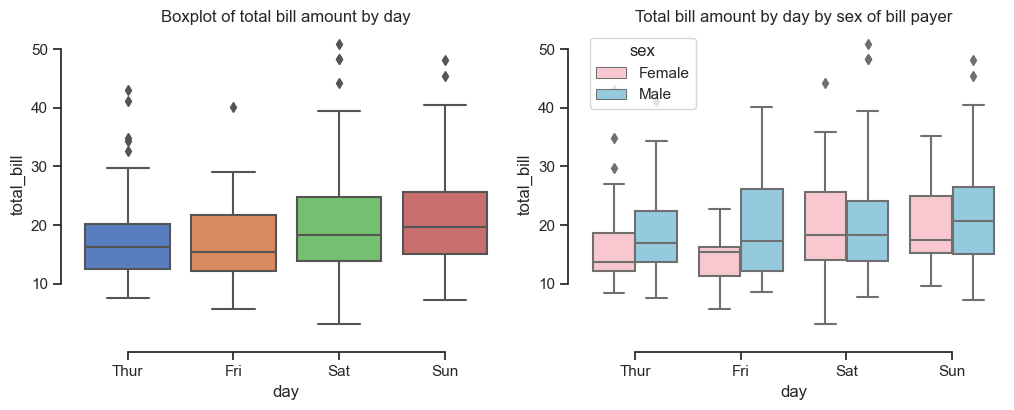

In [19]:
sns.set(style="ticks", palette='pastel')
f, axes = plt.subplots(1, 2, sharey=False, figsize=(12, 4))
sns.set(style="ticks", palette="muted")
sns.boxplot(x="day",y="total_bill" ,data=df, order=day_order, ax=axes[0]) # controlling the day or
# bill amount by sex, grouped by smoking status
axes[0].set_title("Boxplot of total bill amount by day")
sns.boxplot(x="day",y="total_bill" ,hue="sex",data=df, palette=gender_pal,order=day_order, ax=axes[1]) 
# bill amount by dining time, grouped by sex
axes[1].set_title("Total bill amount by day by sex of bill payer")
sns.despine(offset=10, trim=True); 


looking at the total bill amounts per day shows that the amount spent increases at the weekend and is lowest on a Friday. When broken down by the sex of the bill payer it seems that the median amount spent on the bill is higher for males than females and is also more variable for males. Saturday seems to be the only day when the median bills for males and females are similar although there is more of a right skew on the bill amounts by males

Adding additional variables

In [20]:
df['Tip%']=df['tip']/df['total_bill']*100
df['BillPP']=df['total_bill']/df['size']
df['TipPP']=df['tip']/df['size']
df['total_spent']=df['total_bill']+df['tip']
df.head()

,total_bill,tip,sex,smoker,day,time,size,Tip%,BillPP,TipPP,total_spent
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673,8.495000,0.505000,18.00
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159,3.446667,0.553333,12.00
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734,7.003333,1.166667,24.51
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041,11.840000,1.655000,26.99
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765,6.147500,0.902500,28.20


In [21]:
print(f"While the standard deviation of the total_bill amount was quite high at ${df['total_bill'].std():.2f}, the standard deviation of the bill per person seems more reasonable at ${df['BillPP'].std():.2f}")

print(f"This makes sense when the average (mean) bill per person is ${df['BillPP'].mean():.2f}.")
print(f"The tip amount as a percentage of the total bill amount is {df['Tip%'].mean():.2f} percent.\n")

While the standard deviation of the total_bill amount was quite high at $8.90, the standard deviation of the bill per person seems more reasonable at $2.91
This makes sense when the average (mean) bill per person is $7.89.
The tip amount as a percentage of the total bill amount is 16.08 percent.



Now plotting the distribution of the bill per person and percentage tip rates.

C:\Users\keith\AppData\Local\Temp\ipykernel_9944\1074578788.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['BillPP'], kde=True, rug=True, ax=axes[0], color="blue", bins=25)
C:\Users\keith\AppData\Local\Temp\ipykernel_9944\1074578788.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df

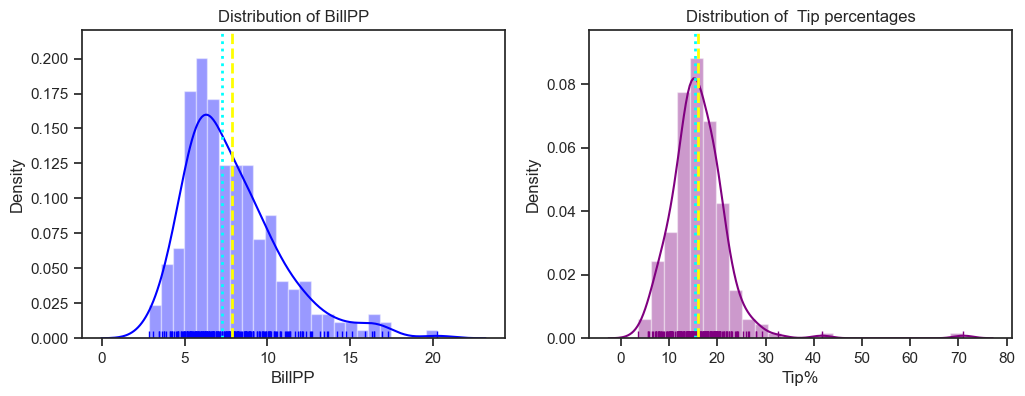

In [22]:
%matplotlib inline
# set up the subplots and figure sizes
f, axes = plt.subplots(1, 2, figsize=(12, 4))

# plot the histograms of total bill amounts
sns.distplot(df['BillPP'], kde=True, rug=True, ax=axes[0], color="blue", bins=25)
# add a vertical line at the mean
axes[0].axvline(df['BillPP'].mean(), color='yellow', linewidth=2, linestyle="--")
# add a vertical line at the median
axes[0].axvline(df['BillPP'].quantile(q=0.5), color='cyan', linewidth=2, linestyle=":")
# add a title
axes[0].set_title("Distribution of BillPP")

#plot the histogram of tip rate
sns.distplot(df['Tip%'], kde=True, rug=True, ax=axes[1], color="purple", bins=25)
# add a vertical line to show the mean
axes[1].axvline(df['Tip%'].mean(), color='yellow', linewidth=2, linestyle="--")
# add a vertical line to show the median
axes[1].axvline(df['Tip%'].quantile(q=0.5), color='cyan', linewidth=2, linestyle=":")
# add title
axes[1].set_title("Distribution of  Tip percentages");


The distribution of bill per person still seems to be a litle bit right skewed like the total bill distibution but less so and also it is less spread out. The distribution of the percentage tip is now distinctly unimodal. The plots below show the distributions of total bill and amount per person on the same plot.

C:\Users\keith\AppData\Local\Temp\ipykernel_9944\652674383.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['total_bill'], color="r", label="total_bill")
C:\Users\keith\AppData\Local\Temp\ipykernel_9944\652674383.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['BillPP'], color='c', 

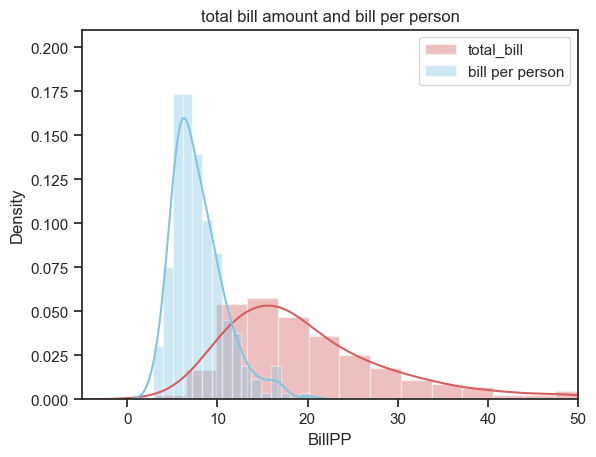

In [23]:
%matplotlib inline
sns.set(style="ticks", palette="muted")
sns.distplot(df['total_bill'], color="r", label="total_bill")
sns.distplot(df['BillPP'], color='c', label="bill per person")
plt.title('total bill amount and bill per person')
plt.xlim(-5,50) 
plt.ylim(0,0.21)
plt.legend();

# Summary plots of the Tips dataset
I will finish up part 1 with some plots that summarise the dataset. These plots can help identify the relationship between total bill and tip that is examined more closely in Part 2 and also highlight some relationships between other variables in the dataset that could be explored in part 3.

Seaborn's pairplotcan be used to show all pairwise relationships of the (variables) in a dataset. The univariate distributions are shown across the diagonal and the relationship between pairs of variables are shown elsewhere. The different levels of a categorical variables can be shown by colour using the hue semantic. The pairplots below show the distributions of total_bill, tip and size variables on the diagonal. The bivariate relationships are shown as scatter plots. The different colours represent the sex of the bill payer in the first pairplot and the smoker status in the second pairplot below.



c:\Users\keith\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


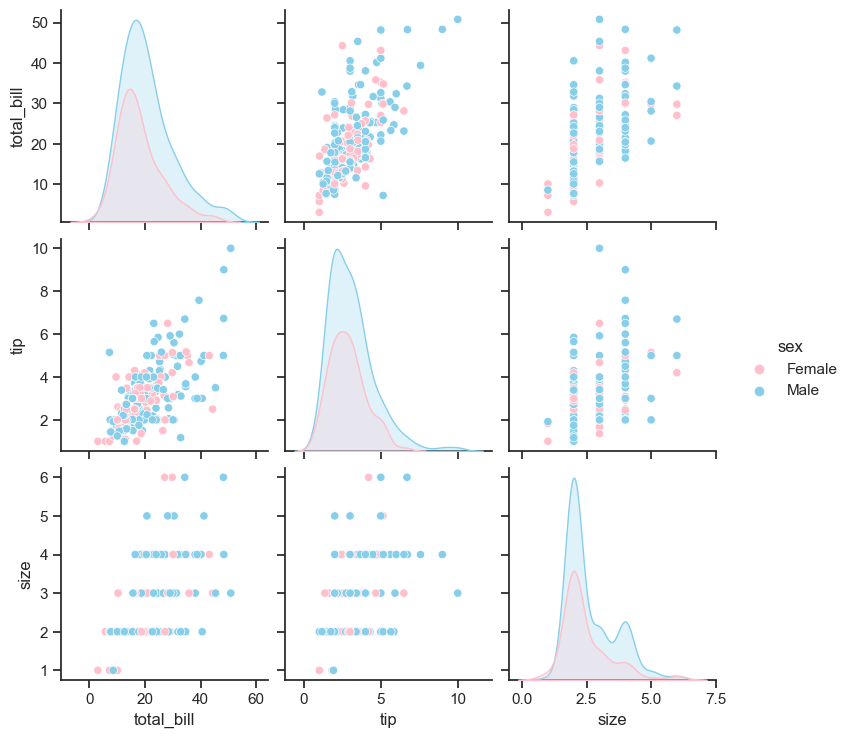

In [25]:
df.loc[:, ['total_bill','tip','sex','smoker','size']]
sns.pairplot(df.loc[:, ['total_bill','tip','sex','smoker','size']], hue="sex", palette=gender_pal);


c:\Users\keith\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


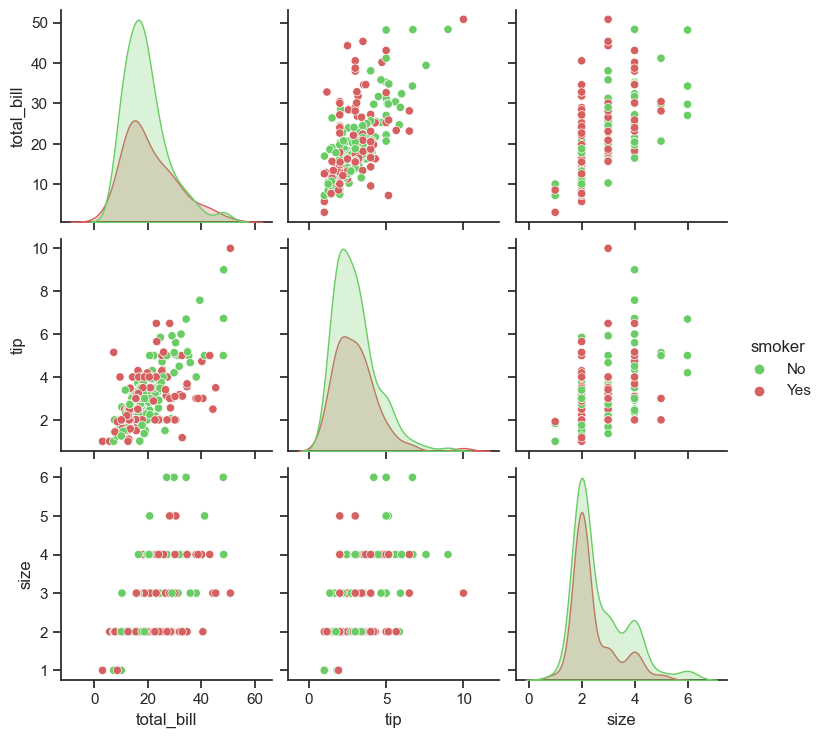

In [26]:
sns.pairplot(df.loc[:, ['total_bill','tip','sex','smoker','size']], hue="smoker",  palette= smoker_pal);